# Bufo bufo

<b>42 samples: 21M, 21F</b>

In [2]:
%matplotlib inline  
## Allows plots to be shown inside the notebook, rather than in a separate windo.
import os
import MISC_RAD_tools_py2 as MISC  ## Custom scripts
import pprint
import subprocess
import numpy

In [2]:
%load_ext rpy2.ipython 
## Module which allows us to run R code inside the notebook

## Stacks

Stacks was run on all individuals with default parameters for Ustacks and Cstacks, as preliminary tests on this data and others showed that these provide a good balance between the quantity and quality (i.e. reliability of genotypes) in the data. 

The final Populations command was:

```
INDIR=/scratch/axiom/FAC/FBM/DEE/nperrin/rana_genome/Bufonids/Bbufo_adult_samples/Stacks
POPMAP=/scratch/axiom/FAC/FBM/DEE/nperrin/rana_genome/Bufonids/Bbufo_adult_samples/Stacks/popmap_kept.txt
UTDIR=/scratch/axiom/FAC/FBM/DEE/nperrin/rana_genome/Bufonids/Bbufo_adult_samples/Stacks/Populations_r08_p2_m6_kept

populations -P $INDIR  -M $POPMAP  -b 1 -r 0.8 -p 2 --min_maf 0.05 --max_obs_het 0.75 -m 8 -t 8 --vcf -O $OUTDIR
```

### Checking per-sample data
First I will the amount of missing genotype calls per sample, in order to identify any which are low quality and can be removed. NOTE - removing low quality samples can allow more loci to pass the -r and -p filters in populations, hence retaining more data. 

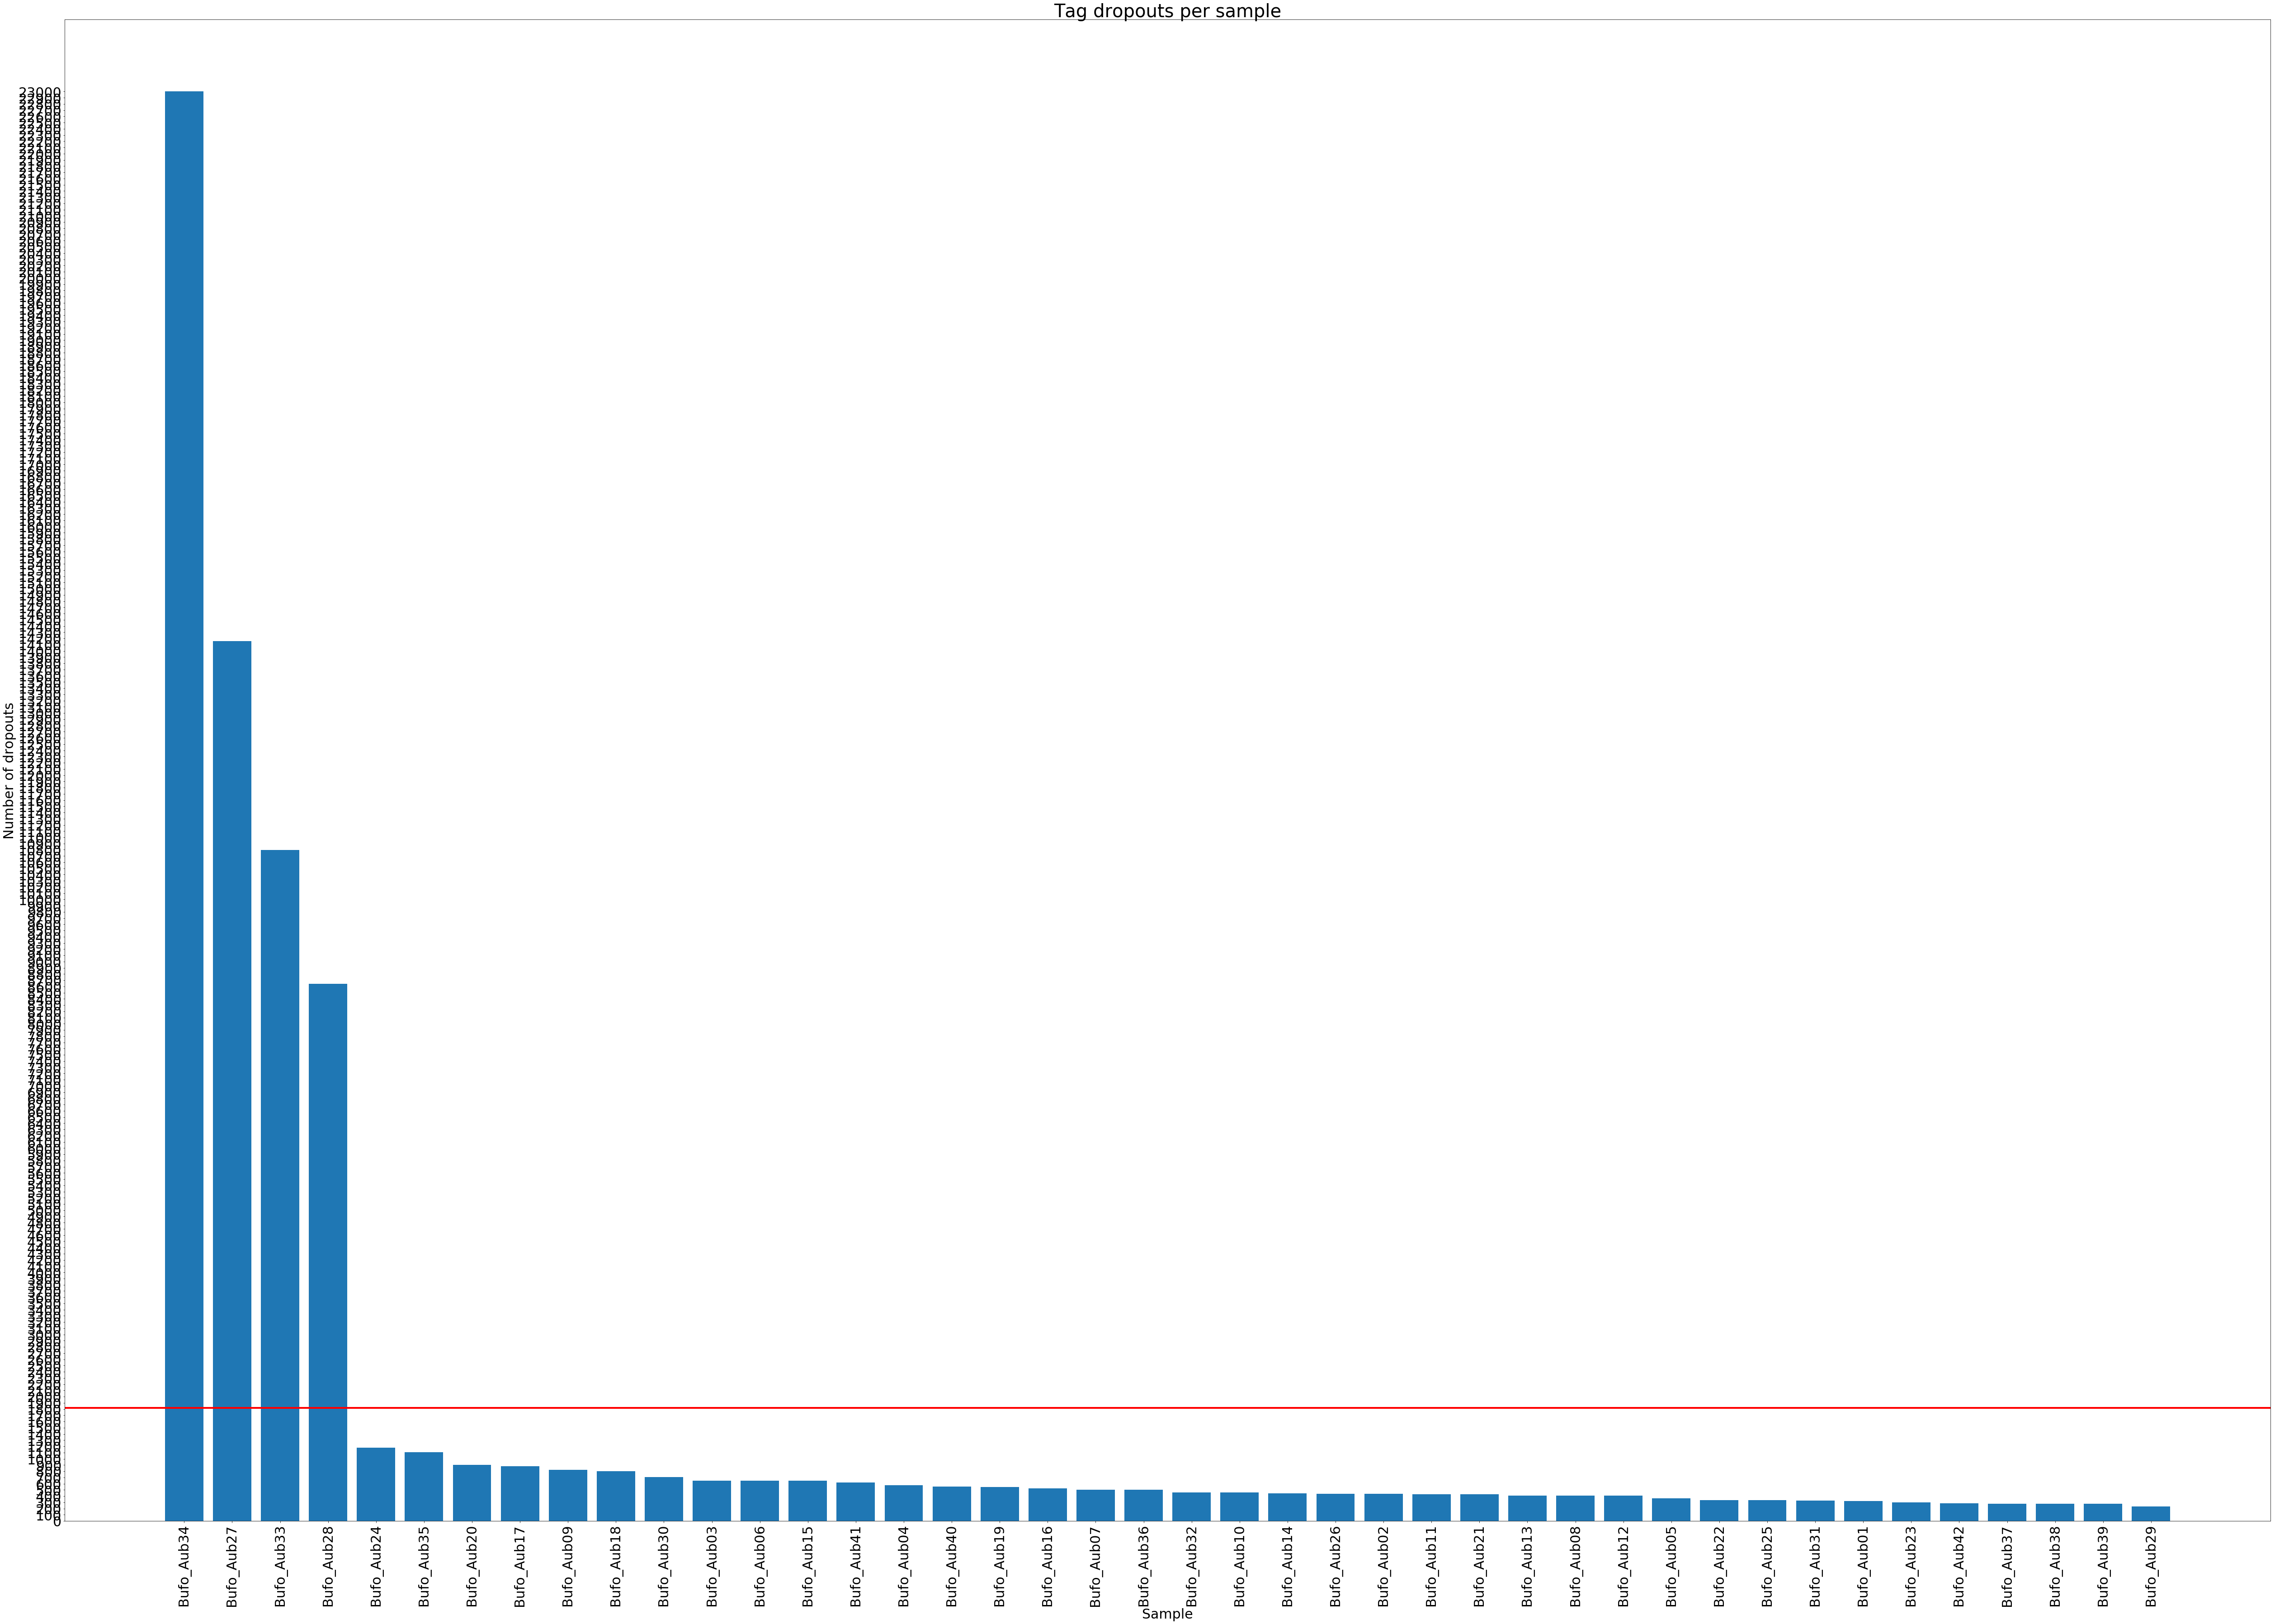

Outputs written to:
/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Tag_dropouts_per_sample.txt
/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Tag_dropouts_per_tag.txt
/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Tag_dropouts_per_sample.pdf
/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Tag_dropouts_per_tag.pdf
/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//blacklist.txt


In [3]:
wd = "/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults/"

## The function below just plots the amount of missing genotype calls for all 

blacklist = MISC.missing_data_finder("%s/batch_1.vcf" % wd, wd)

Will remove 4 samples:
````
Bufo_AUB27
Bufo_AUB28
Bufo_AUB33
Bufo_AUB34
````

## Summary stats for the dataset

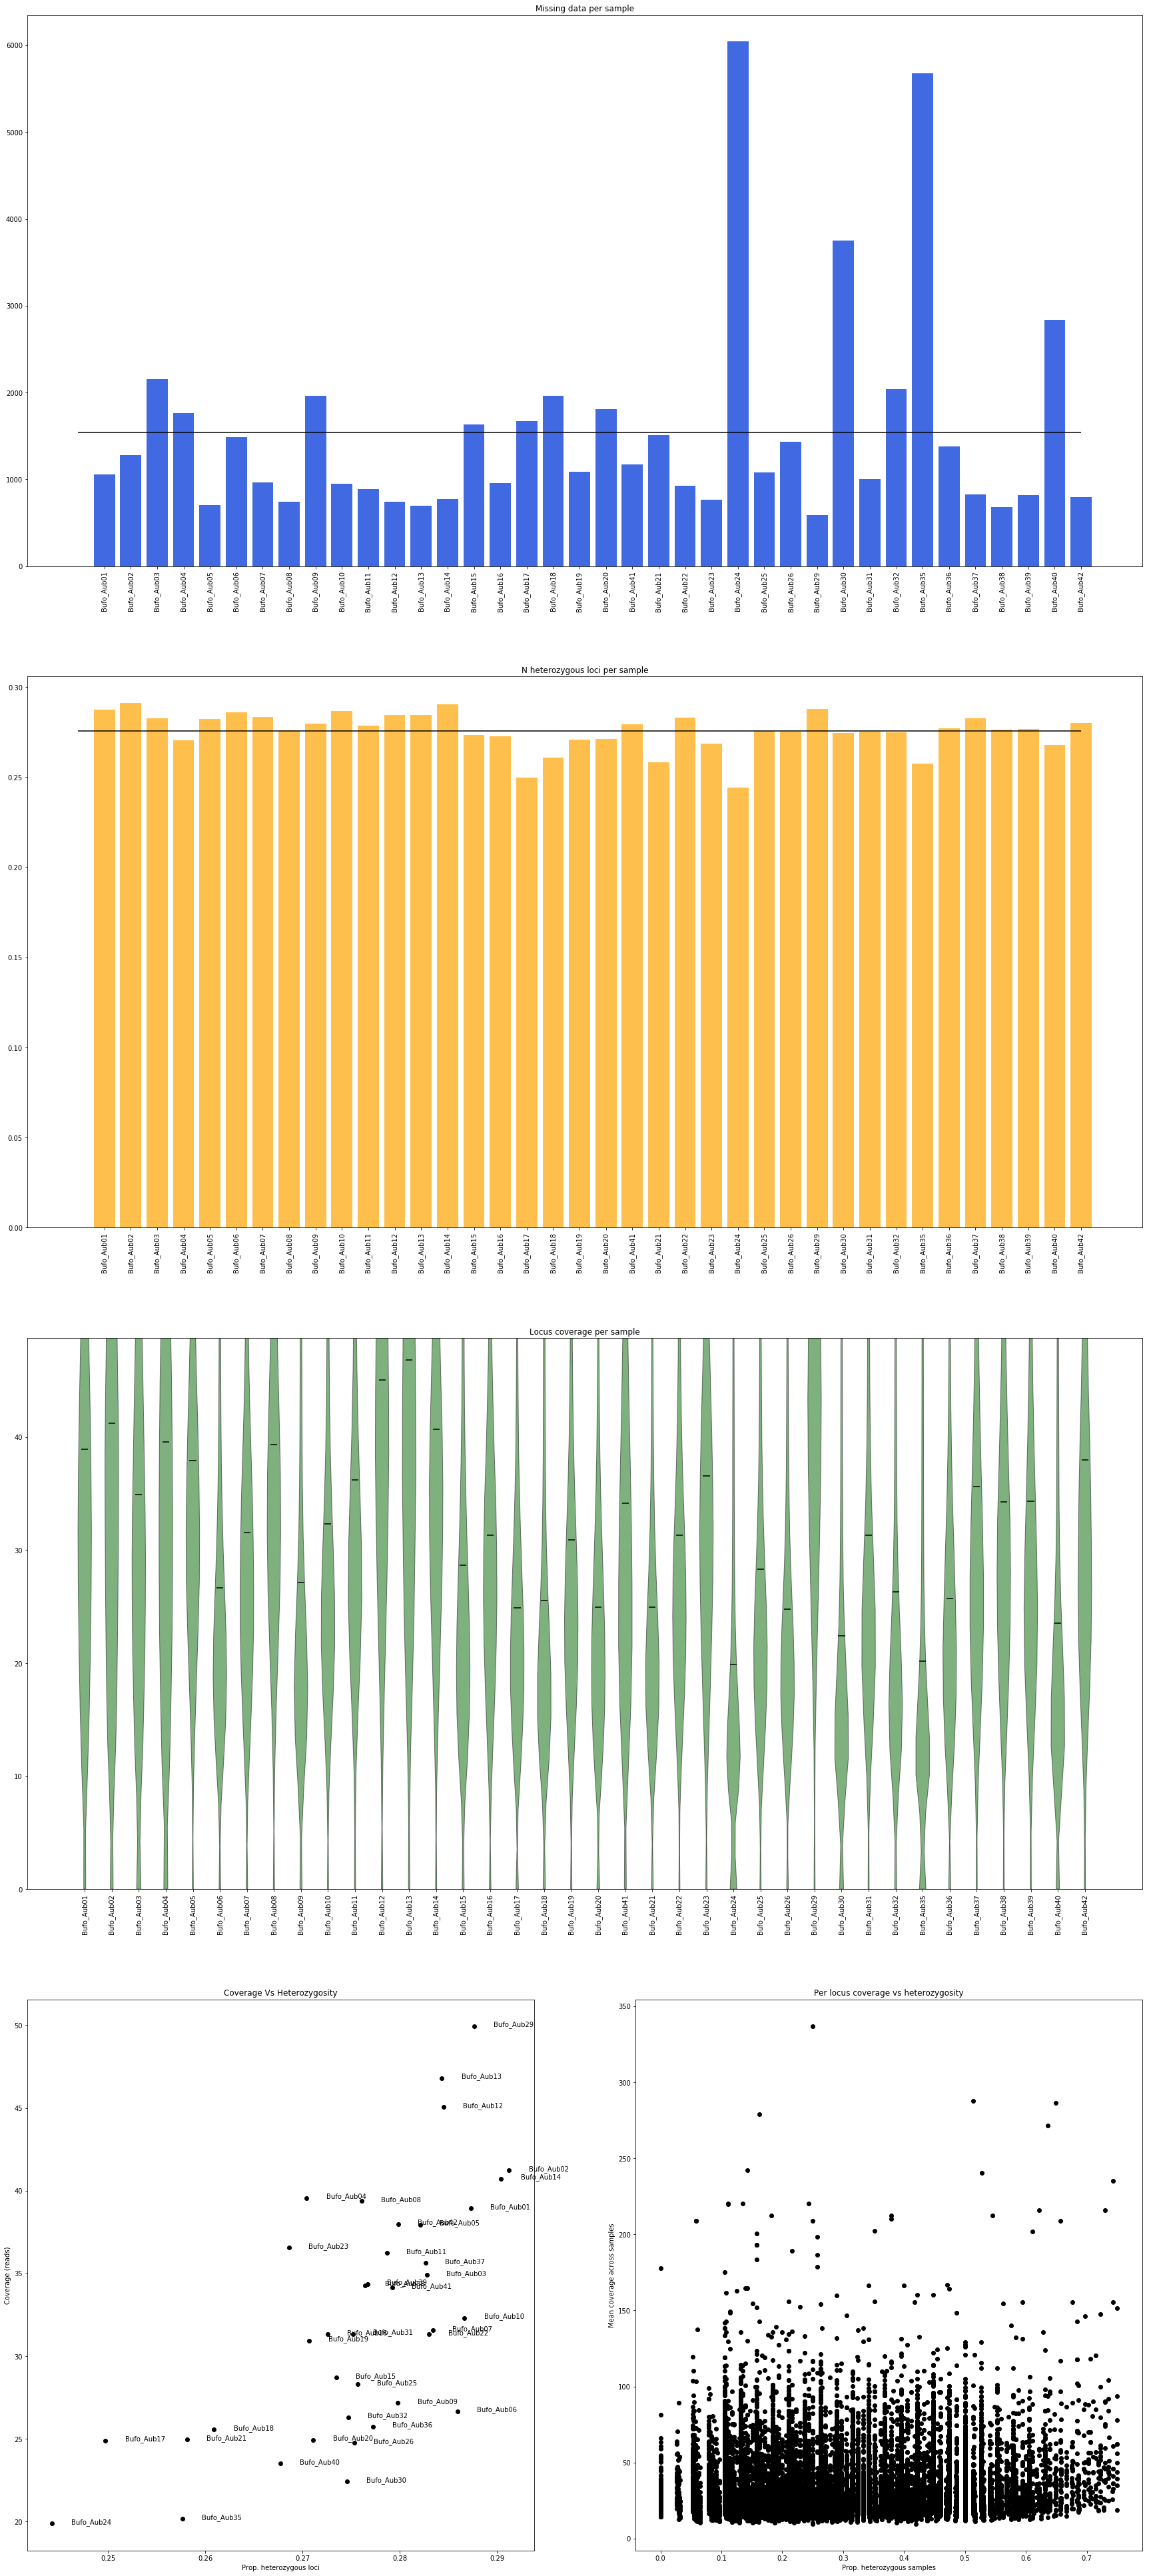

#### DONE ####

Number of Loci = 35084
Average coverage = 32.2708184568 reads


In [16]:
MISC.Summary_plotter("%s/batch_1_kept.vcf" % wd, "1111", False)

So a nice dataset! Lets look for some sex linked loci!

## Looking for sex linked loci

## Testing threshold parameters

|Param_set| Hom | Freq_het | Het_het | Spec |
|-----|----------|---------|------|
|1|0.7|0.3|0.5|0.5|
|2|0.7|0.325|0.6|0.6|
|3|0.7|0.35|0.7|0.7|
|4|0.7|0.4|0.8|0.8|
|5|0.7|0.425|0.9|0.9|
|6|0.7|0.45|1|1|
|7|0.8|0.3|0.5|0.5|
|8|0.8|0.325|0.6|0.6|
|9|0.8|0.35|0.7|0.7|
|10|0.8|0.4|0.8|0.8|
|11|0.8|0.425|0.9|0.9|
|12|0.8|0.45|1|1|
|13|0.9|0.3|0.5|0.5|
|14|0.9|0.325|0.6|0.6|
|15|0.9|0.35|0.7|0.7|
|16|0.9|0.4|0.8|0.8|
|17|0.9|0.425|0.9|0.9|
|18|0.9|0.45|1|1|
|19|1|0.3|0.5|0.5|
|20|1|0.325|0.6|0.6|
|21|1|0.35|0.7|0.7|
|22|1|0.4|0.8|0.8|
|23|1|0.425|0.9|0.9|
|24|1|0.45|1|1|


In [2]:
import MISC_RAD_tools_py2 as MISC2

## Making the parameter dictionaries to test

## Get the template

template_dict = MISC2.SLM_permutations("", template = True)

Hom = [0.7,0.8,0.9,1]
Freq_het = [0.3,0.325,0.35,0.4,0.425,0.45]
Het_het = [0.5,0.6,0.7,0.8,0.9,1]
Spec = [0.5,0.6,0.7,0.8,0.9,1]

working_dir = "/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults/"

Parameter_dictionaries = {}
dict_index = 1

for i in Hom:
    for j in range(0, len(Freq_het)):

        template_dict["Name"] = "Param_set_%s" % dict_index
        
        template_dict['Catalog'] = "%s/batch_1.catalog.tags.tsv.gz" % working_dir
        template_dict['Pop_map'] = "%s/Sex_ID_info.txt" % working_dir
        template_dict['VCF'] = "%s/batch_1.vcf" % working_dir


        template_dict['homogametic_REF_allele_freq'] = i 
        template_dict['X_or_Z_freq_threshold'] = Freq_het[j]
        
        template_dict['homogamtic_homozygosity_threshold'] = i  
        template_dict['heterogamtic_heterozygosity_threshold'] = Het_het[j]
        
        template_dict['sex_presence_threshold'] = Spec[j]
        

        Parameter_dictionaries["Param_set_%s" % dict_index] = template_dict.copy() ## have to use copy here for some reason!
        
        dict_index += 1
        


In [4]:
MISC2.SLM_permutations(Parameter_dictionaries, Dict_template = False, N_perms = 49, threads = 7, template = False, plot = True)

('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.0min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 11.8min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_4.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.2min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 11.9min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_5.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.6min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 11.9min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_6.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.1min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 11.8min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_7.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.5min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 11.9min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_1.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.4min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 12.0min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_2.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.2min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 11.8min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_3.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.2min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 11.9min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_8.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.3min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 11.7min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_9.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.3min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 11.7min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_16.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.4min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 11.9min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_17.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.3min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 12.0min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_14.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.3min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 11.9min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_15.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.3min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 11.9min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_12.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.4min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 12.0min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_13.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.2min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 11.9min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_10.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.0min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 11.8min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_11.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.3min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 11.9min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_18.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.1min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 12.0min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_19.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.3min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 12.0min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_23.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.2min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 11.8min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_22.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.2min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 12.0min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_21.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.4min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 12.1min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_20.txt
('processing dataset in', '/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//batch_1.vcf')

Randomisations happening in /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations

Random sex info files made

Running randomisations



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:  9.3min
[Parallel(n_jobs=7)]: Done  49 out of  49 | elapsed: 11.9min finished


Results outputted to /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Randomisations_Param_set_24.txt

Running SLM_finder for real sex assignments:
	Param_set_4
	Param_set_5
	Param_set_6
	Param_set_7
	Param_set_1
	Param_set_2
	Param_set_3
	Param_set_8
	Param_set_9
	Param_set_16
	Param_set_17
	Param_set_14
	Param_set_15
	Param_set_12
	Param_set_13
	Param_set_10
	Param_set_11
	Param_set_18
	Param_set_19
	Param_set_23
	Param_set_22
	Param_set_21
	Param_set_20
	Param_set_24

Real sex assignment results outputted to here: /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults//Randomisations/Real_sex_assignment_SLMs.txt
All done!


Figures saved here: /home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults/Randomisations//Randomisation_plots.pdf


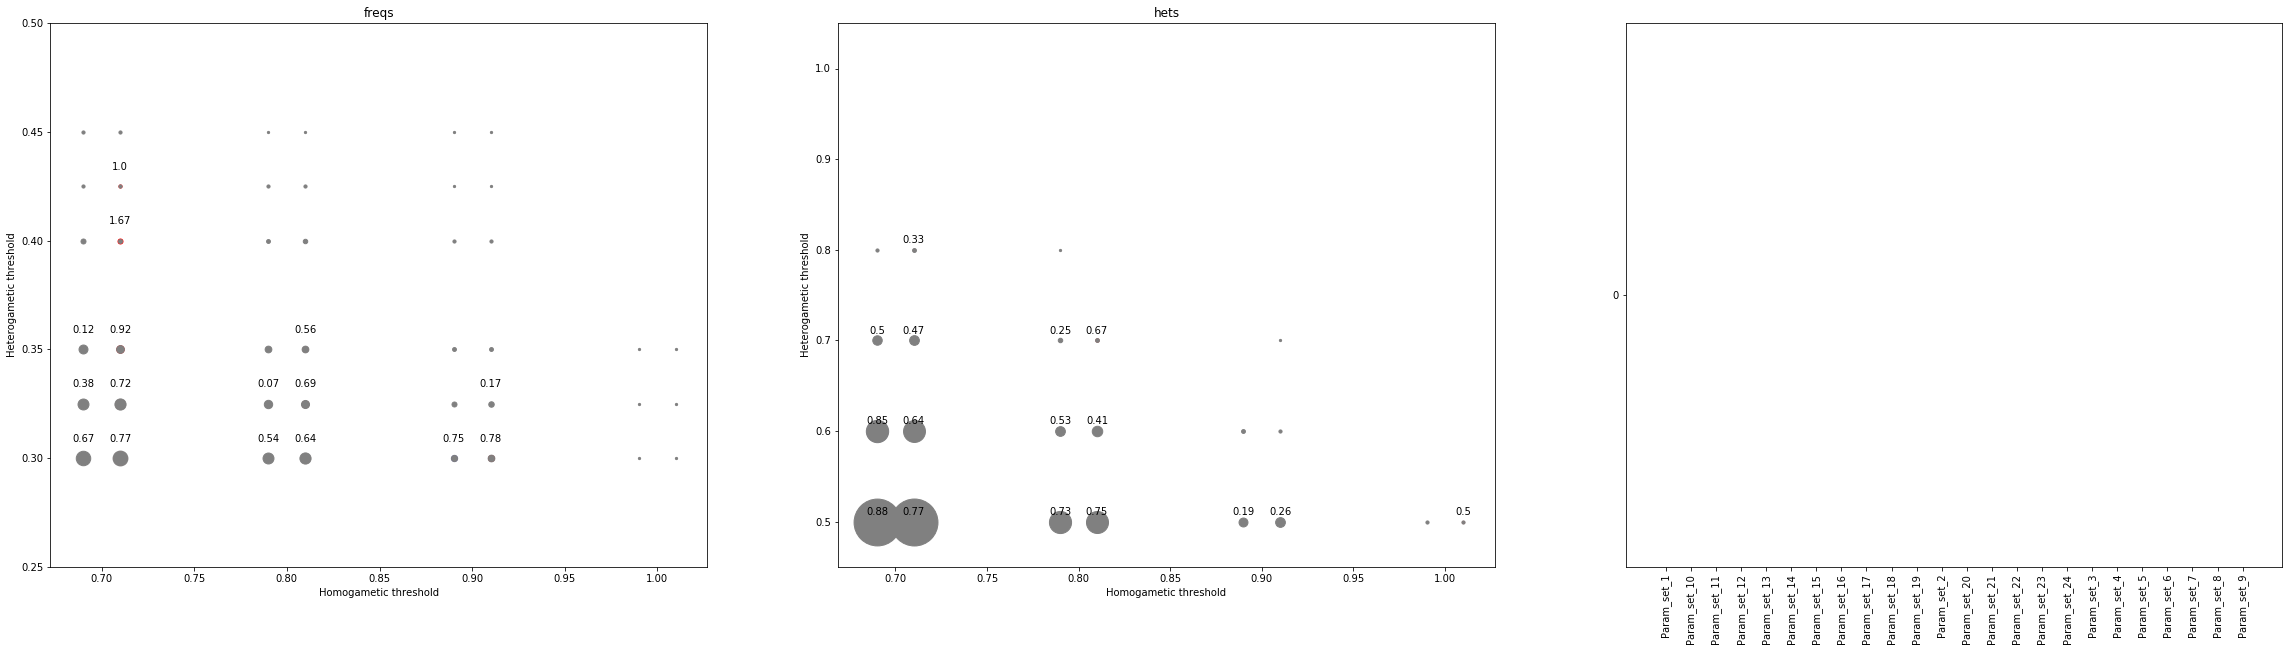

In [3]:
multiplier = 5
MISC2.Perm_plotter("/home/djeffrie/Data/Dufresnes_bufonids/Bbufo_adults/Randomisations/", Parameter_dictionaries, multiplier)

There is almost no sex linked signal here, only for very relaxed parameters for the frequency method. For this reason we will not continue to look for sex linked markers using SLM finder for this dataset. 